In [1]:
## Let's go ahead and start with some imports
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

## For reading stock data from yahoo and nse
import fix_yahoo_finance as yf
yf.pdr_override()
from nsepy import get_history

## F or time stamps
from datetime import timedelta
from datetime import date
import calendar

## For stats
import statsmodels.api as sm
from scipy import stats

## For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\moodmyntra\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#data_1 = pd.DataFrame((get_history(symbol='PNB', start=date(2011,1,1), end=today)['Close']))
today = date.today()

In [3]:
assets=['PNB.NS','BANKBARODA.NS','ICICIBANK.NS','IDFCBANK.NS','SBIN.NS','YESBANK.NS','KOTAKBANK.NS','AXISBANK.NS','HDFCBANK.NS','RBLBANK.NS','FEDERALBNK.NS','INDUSINDBK.NS']
banksdata=pd.DataFrame()
for a in assets:
    banksdata[a] = pdr.get_data_yahoo(tickers=a, start="2012-01-01",end=today, as_panel = False)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
banksdata.tail()

,PNB.NS,BANKBARODA.NS,ICICIBANK.NS,IDFCBANK.NS,SBIN.NS,YESBANK.NS,KOTAKBANK.NS,AXISBANK.NS,HDFCBANK.NS,RBLBANK.NS,FEDERALBNK.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,
2018-05-28,88.699997,145.399994,299.250000,42.099998,272.049988,345.200012,1297.150024,546.150024,2029.239014,521.900024,86.699997,1914.449951
2018-05-29,85.650002,140.399994,289.899994,40.849998,264.299988,338.049988,1284.250000,547.750000,2019.699951,527.450012,86.800003,1877.300049
2018-05-30,86.099998,138.449997,284.899994,40.049999,267.149994,343.149994,1303.250000,541.650024,2035.350098,521.799988,86.099998,1884.849976
2018-05-31,83.650002,136.850006,285.799988,40.700001,269.549988,346.200012,1334.599976,545.900024,2139.449951,515.900024,84.800003,1955.449951
2018-06-01,82.949997,136.949997,289.299988,40.750000,266.700012,342.700012,1318.000000,536.650024,2110.600098,507.549988,83.000000,1915.400024


In [5]:
banksdata.iloc[0]

PNB.NS            87.926872
BANKBARODA.NS     82.026894
ICICIBANK.NS      80.678978
IDFCBANK.NS             NaN
SBIN.NS           89.596375
YESBANK.NS        33.099960
KOTAKBANK.NS     209.097504
AXISBANK.NS      125.861229
HDFCBANK.NS      404.712311
RBLBANK.NS              NaN
FEDERALBNK.NS     18.972700
INDUSINDBK.NS    218.459244
Name: 2012-01-02 00:00:00, dtype: float64

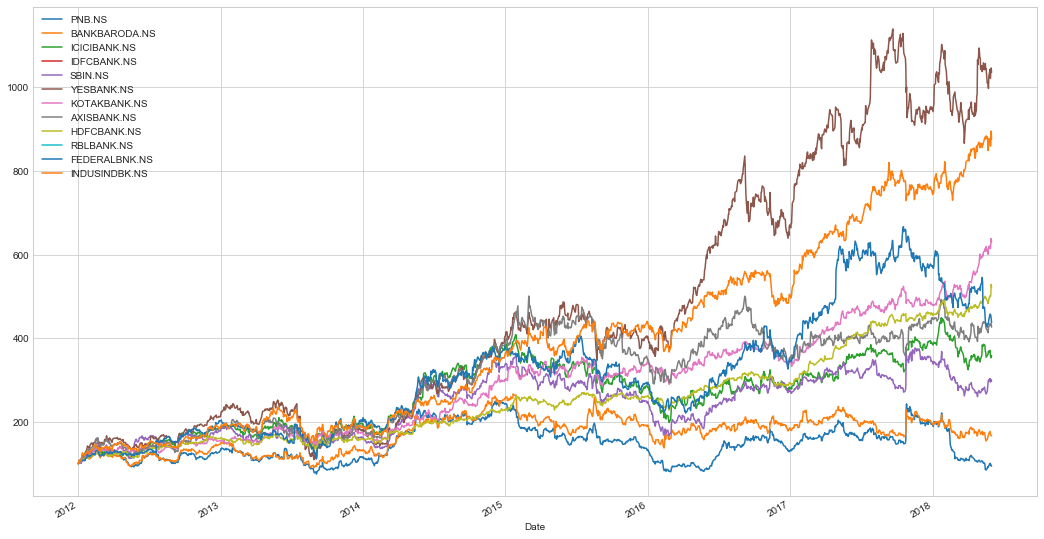

In [51]:
(banksdata/banksdata.iloc[0]*100).plot(figsize=(18,10));
plt.show()

In [8]:
banks_rets = banksdata.pct_change()

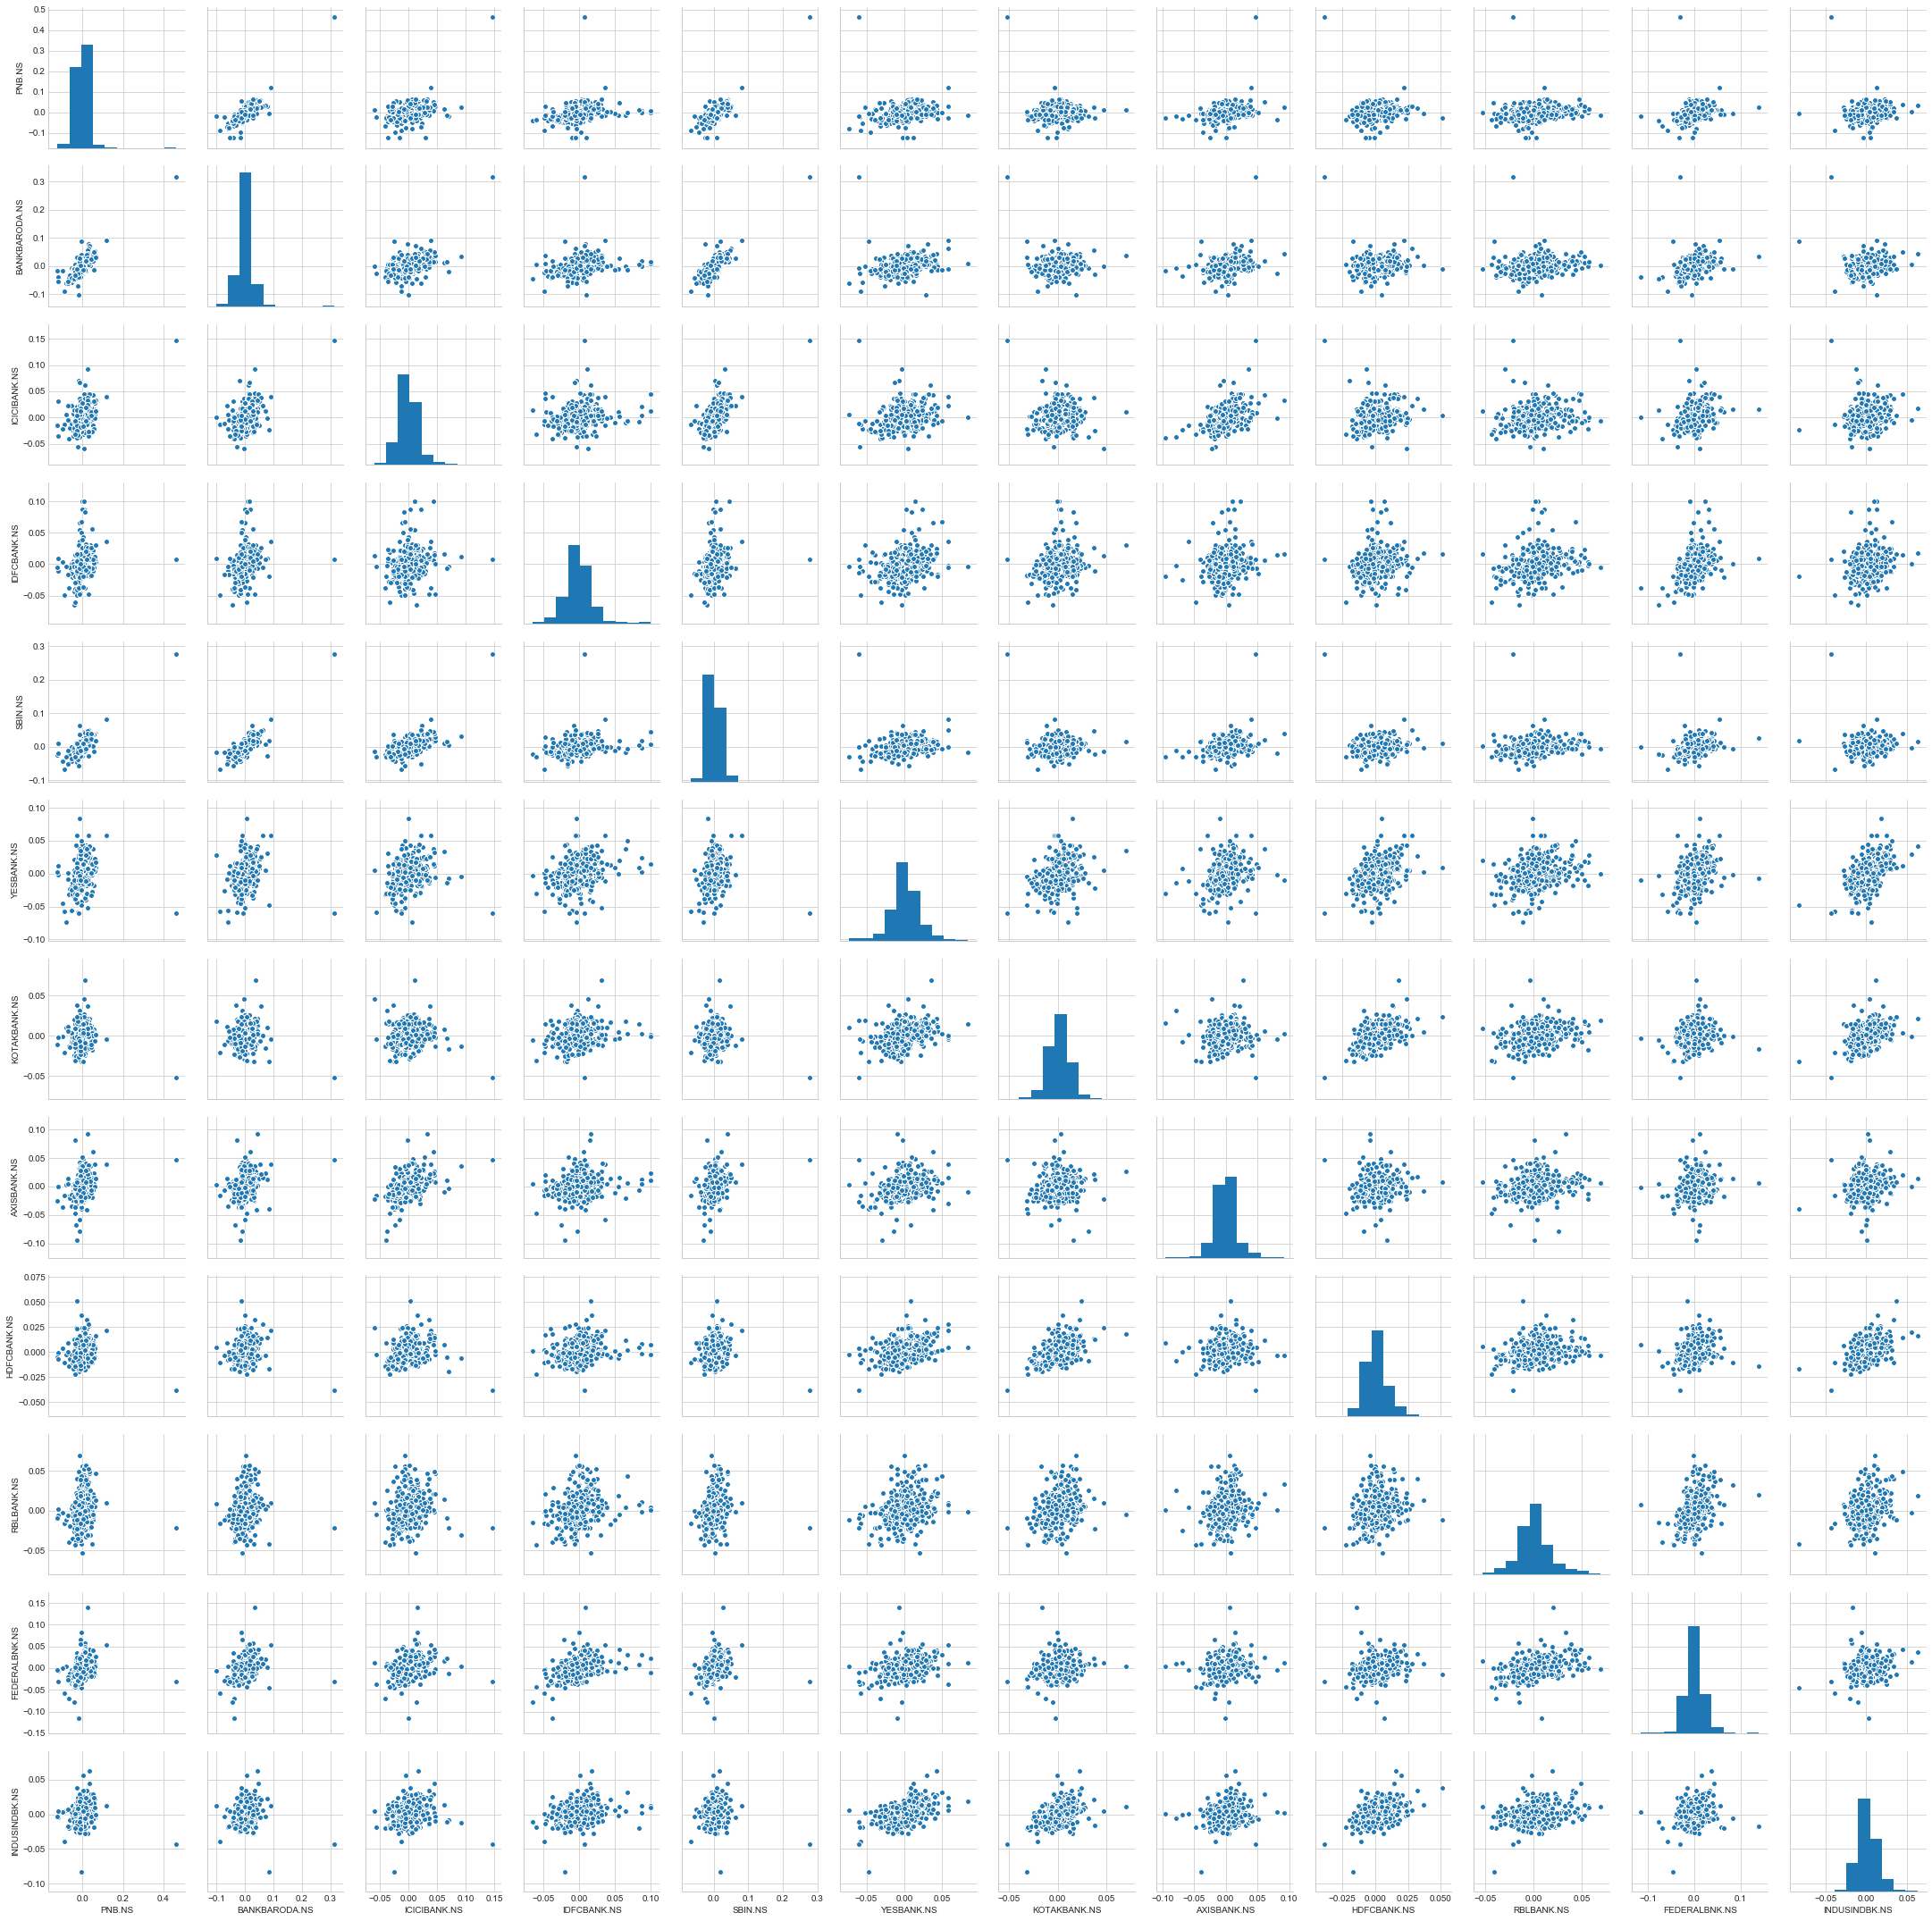

In [9]:
sns.pairplot(banks_rets.dropna())

# Value at Risk

Value at risk (VaR) is a statistical technique used to measure and quantify the level of financial risk within a firm 
or investment portfolio over a specific time frame. This metric is most commonly used by investment and commercial banks 
to determine the extent and occurrence ratio of potential losses in their institutional portfolios. VaR calculations can be 
applied to specific positions or portfolios as a whole or to measure firm-wide risk exposure.


In [10]:
rets = banks_rets.dropna()

In [41]:
PNB=str(round((rets['PNB.NS'].quantile(0.05))*100,2)) + "%"
BANKBARODA=str(round((rets['BANKBARODA.NS'].quantile(0.05))*100,2)) + "%"
ICICIBANK=str(round((rets['ICICIBANK.NS'].quantile(0.05))*100,2)) + "%"
IDFCBANK=str(round((rets['IDFCBANK.NS'].quantile(0.05))*100,2)) + "%"
SBIN=str(round((rets['SBIN.NS'].quantile(0.05))*100,2)) + "%"
YESBANK=str(round((rets['YESBANK.NS'].quantile(0.05))*100,2)) + "%"
KOTAKBANK=str(round((rets['KOTAKBANK.NS'].quantile(0.05))*100,2)) + "%"
HDFCBANK=str(round((rets['HDFCBANK.NS'].quantile(0.05))*100,2)) + "%"
RBLBANK=str(round((rets['RBLBANK.NS'].quantile(0.05))*100,2)) + "%"
FEDERALBNK=str(round((rets['FEDERALBNK.NS'].quantile(0.05))*100,2)) + "%"
INDUSINDBK=str(round((rets['INDUSINDBK.NS'].quantile(0.05))*100,2)) + "%"
AXISBANK=str(round((rets['AXISBANK.NS'].quantile(0.05))*100,2)) + "%"

In [42]:
VaR=[PNB,BANKBARODA,ICICIBANK,IDFCBANK,SBIN,YESBANK,KOTAKBANK,AXISBANK,HDFCBANK,RBLBANK,FEDERALBNK,INDUSINDBK]

In [43]:
irow = pd.Index(['PNB','BANKBARODA','ICICIBANK','IDFCBANK','SBIN','YESBANK','KOTAKBANK','AXISBANK','HDFCBANK','RBLBANK','FEDERALBNK','INDUSINDBK'],name="Stock")

In [44]:
icolumn= pd.Index(['VaR'])

In [45]:
data = pd.DataFrame(VaR, index=irow, columns=icolumn)
data

,VaR
Stock,
PNB,-3.85%
BANKBARODA,-3.71%
ICICIBANK,-2.58%
IDFCBANK,-2.91%
SBIN,-2.62%
YESBANK,-2.9%
KOTAKBANK,-1.67%
AXISBANK,-2.53%
HDFCBANK,-1.16%


The 0.05 empirical quantile of daily returns of PNB at -3.85%. That means that with 95% confidence, our worst daily loss will not exceed 3.85%. If we have a 1 million dollar investment, our one-day 5% VaR is 3.85 % * 1,000,000 = $38,500.